In [1]:
from fastai.vision.all import *

In [9]:
path = untar_data(URLs.MNIST)

In [10]:
Path.BASE_PATH = path

In [12]:
(path/'training').ls()

(#10) [Path('training/8'),Path('training/3'),Path('training/9'),Path('training/2'),Path('training/4'),Path('training/1'),Path('training/0'),Path('training/5'),Path('training/7'),Path('training/6')]

In [21]:
mnist = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter('training', 'testing'),
    get_y=parent_label)

mnist.summary(path)  

Setting-up type transforms pipelines
Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_png/training/8/23232.png
    applying PILBase.create gives
      PILImageBW mode=L size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/mnist_png/training/8/23232.png
    applying parent_label gives
      8
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(8)

Final sample: (PILImageBW mode=L size=28x28, TensorCategory(8))


Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipelin

In [24]:
dls = mnist.dataloaders(path, bs=256)

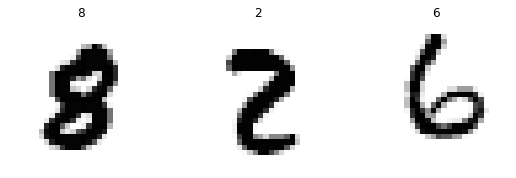

In [25]:
dls.show_batch(max_n=3)

In [26]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

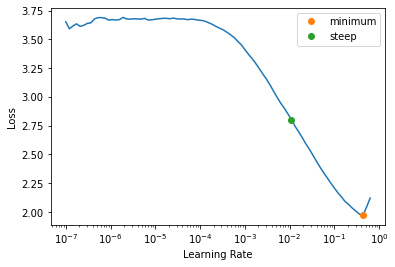

In [27]:
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [28]:
learn.fine_tune(5, base_lr=1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.249994,0.280684,0.940300,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.098060,0.085108,0.981400,00:47
1,0.117734,0.108715,0.980700,00:41
2,0.051221,0.051002,0.989000,00:46
3,0.024024,0.022304,0.995100,00:42
4,0.011243,0.018923,0.995700,00:42


In [30]:
lr_min*10

0.43651583790779114

In [32]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5, base_lr=0.4365)

epoch,train_loss,valid_loss,accuracy,time
0,6.750568,19.060888,0.834900,00:37


epoch,train_loss,valid_loss,accuracy,time
0,1.012405,0.317868,0.979400,00:39
1,1.317694,5.475873,0.899900,00:43
2,0.489756,0.427331,0.975600,00:40
3,0.121829,0.080760,0.990800,00:44
4,0.027702,0.032607,0.994400,00:44


In [33]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,0.303659,3.220056,0.670000,00:41
1,0.117805,0.058143,0.984400,00:43
2,0.045221,0.030086,0.991600,00:47


In [34]:
learn.unfreeze()

SuggestedLRs(valley=1.4454397387453355e-05)

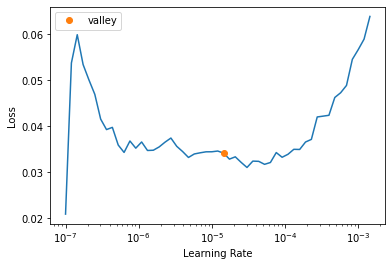

In [35]:
learn.lr_find()

In [36]:
learn.fit_one_cycle(3, 1e-5)

epoch,train_loss,valid_loss,accuracy,time
0,0.034709,0.028857,0.991800,00:44
1,0.027139,0.025731,0.992400,00:33
2,0.025055,0.025165,0.992700,00:30


In [38]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fit_one_cycle(3, 1e-1)
learn.unfreeze()
learn.fit_one_cycle(5, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.287147,1.250951,0.830500,00:32
1,0.121235,0.058090,0.985300,00:35
2,0.041004,0.029417,0.991200,00:29


epoch,train_loss,valid_loss,accuracy,time
0,0.034596,0.028242,0.991500,00:32
1,0.028122,0.027292,0.992800,00:39
2,0.026917,0.027400,0.991800,00:33
3,0.025536,0.025014,0.992900,00:29
4,0.022028,0.024996,0.992700,00:32


In [40]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(6, base_lr=1e-1, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,0.314237,0.157701,0.953900,00:34
1,0.202352,0.149204,0.967900,00:37
2,0.355791,0.278749,0.972700,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.106693,0.096651,0.978000,00:30
1,0.181614,0.276264,0.982000,00:30
2,0.067712,0.052081,0.988900,00:35
3,0.046931,0.041822,0.990600,00:29
4,0.019849,0.020515,0.995100,00:30
5,0.010736,0.018522,0.995600,00:28
